In [1]:
# 필요한 라이브러리 불러오기 
import pandas as pd                  # 데이터 프레임 조작을 위해 판다스 불러오기 
import numpy as np                   # 수치 및 데이터 분석, 배열 조작을 위해  numpy 불러오기

%matplotlib inline
import matplotlib.pyplot as plt      # 데이터 시각화 수행을 위해 matplotlib 불러오기
import seaborn as sns                # 데이터 시각화 수행을 위해 seaborn 불러오기
from copy import copy                # 데이터 프레임을 복사할 때 사용을 위해 copy 불러오기 
from scipy import stats              # 여러가지 과학적인 계산을 위해 scipy 라이브러리에 다양한 통게 확률을 조작하기 위해 stats 모듈 불러오기
import plotly.express as px          # 그래프를 고수준의 인터페이스로 만들기 위해 express 모듈 불러오기 
import plotly.figure_factory as ff   # 더 복잡한 시각화를 위해 figure_factory 모듈 불러오기 
import plotly.graph_objects as go    # 좀 더 디테일한 그래프 설정을 위해 graph_objects 모듈 불러오기

# 경고 메시지 무시 설정
import warnings
warnings.filterwarnings('ignore')

In [2]:
# 한글 깨짐 현상을 막기 위해 폰트 적용
from matplotlib import rc
import platform

if platform.system() == 'Windows':
    rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin': 
    rc('font', family='AppleGothic')
else: #linux
    rc('font', family='NanumGothic')
    
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 현상 해결 코드

## 데이터 확인 
- 데이터 전처리를 마친 데이터를 불러와서 확인 

In [3]:
# 코스피 데이터 불러오기 
kospi_stocks = pd.read_csv("data/kospi_stocks.csv")
# 날짜 별로 정렬
kospi_stocks = kospi_stocks.sort_values(by=["Date"])
print(f"코스피 지수(시장 지수)를 포함한 총 주식수는 총 {len(kospi_stocks.columns[1:])}건 입니다.")
kospi_stocks

코스피 지수(시장 지수)를 포함한 총 주식수는 총 8건 입니다.


,Date,KOSPI,SAMSUNG,HYUNDAI_CAR,KIA,KORMAR,NAVER,KAKAO,THE_HYUNDAI
245,2019-01-02,2010.00,38750,114000,32800,70000,118000,20400,87700
244,2019-01-03,1993.70,37600,116500,32850,69600,122000,20500,87500
243,2019-01-04,2010.25,37450,119500,34850,70100,125500,20700,88200
242,2019-01-07,2037.10,38750,120500,34200,70900,131500,20600,88400
241,2019-01-08,2025.27,38100,119500,33800,68400,130000,19980,87100
...,...,...,...,...,...,...,...,...,...
743,2022-12-23,2313.69,58100,157000,62700,42400,178000,53400,58900
742,2022-12-26,2317.14,57900,158000,63700,41900,178500,53600,59000
741,2022-12-27,2332.79,58100,158000,64100,44100,181000,54400,59400
740,2022-12-28,2280.45,56600,154000,60900,43200,180000,53600,61100


- 컬럼 정보는 아래와 같음
    - KOSPI: 코스피 지수(한국종합주가지수로 유가증권시장에서 상장된 회사들의 주식에 대한 총합인 시가총액의 기준과 비교 시접을 비교하여 나태는 지표)
    - SAMSUNG: 삼성전자(전기, 전자, 반도체)
    - HYUNDAI_CAR: 현대차(자동차)
    - KIA: 기아차(자동차)
    - KORMAR: 한국콜마(화장품)
    - NAVER: 네이버(IT)
    - KAKAO: 카카오(IT)
    - THE_HYUNDAI: 현대백화점(유통)
- 주가 종목선정 기준
    - 필자가 보고 싶은 주가 정보와 대표적인 종목 그리고 섹터별로 선별함 (한마디로 주관적인 기준)

In [4]:
# 코스닥 데이터 불러오기 
kosdaq_stocks = pd.read_csv("data/kosdaq_stocks.csv")
# 날짜 별로 정렬
kosdaq_stocks = kosdaq_stocks.sort_values(by=["Date"])
print(f"코스닥 지수(시장 지수)를 포함한 총 주식수는 {len(kosdaq_stocks.columns[1:])}건 입니다.")
kosdaq_stocks

코스닥 지수(시장 지수)를 포함한 총 주식수는 7건 입니다.


,Date,KOSDAQ,ECHOPRO_BM,HANA_METERIALS,SM_ENTER,JYP_ENTER,PERARLABYSS,SEOUL_SMC
204,2019-03-06,NaN,16927,18300,46950,30000,166800,24550
203,2019-03-07,NaN,17247,18550,44900,29350,169300,22150
202,2019-03-08,NaN,17223,18150,45300,30100,170300,22050
201,2019-03-11,NaN,17050,18250,40550,31200,182300,21750
200,2019-03-12,NaN,16557,19000,39050,29950,184100,22250
...,...,...,...,...,...,...,...,...
702,2022-12-23,691.25,97000,33100,77100,66900,41900,10900
701,2022-12-26,694.68,97300,34800,79100,67300,43400,11050
700,2022-12-27,704.19,97900,34850,79300,68200,44400,11100
699,2022-12-28,692.37,92200,33350,76000,66900,43000,10500


- 컬럼 정보는 아래와 같음
    - KOSDAQ: 코스닥 지수(밴처 기업, 첨단 기술주 중심인 나스닥을 본따 만든 지표, 유가증권 시장(코스피)과는 규제 조치가 별개로 이루어진 시장)
    - ECHOPRO_BM: 에코프로비엠(2차전지)
    - HANA_METERIALS: 하나머티리얼즈(반도체)
    - SM_ENTER: SM 엔터테인먼트(엔터테인먼트)
    - JYP_ENTER: JYP 엔터테인먼트(엔터테인먼트)
    - PERARLABYSS: 펄어비스(게임)
    - SEOUL_SMC: 서울 반도체(반도체)
- 주가 종목선정 기준
    - 필자가 보고 싶은 주가 정보와 대표적인 종목 그리고 섹터별로 선별함 (한마디로 주관적인 기준)

## 간단한 EDA 

In [5]:
# 코스피 평균 수익은 얼마일까?
kospi_stocks[kospi_stocks.columns.difference(["Date"])].mean()  # 날짜 컬럼 제외 

HYUNDAI_CAR    166503.451777
KAKAO           69606.314721
KIA             60405.025381
KORMAR          48793.248731
KOSPI            2488.587777
NAVER          257226.903553
SAMSUNG         61665.989848
THE_HYUNDAI     75607.918782
dtype: float64

- 코스피 지수의 평균 수익은 "2488.59" 이다. 
- 그리고 한국을 대표하는 주식 삼성전자의 평균 수익은 "61665.98" 이다.

In [6]:
# 코스피의 최소 분포도를 갖는 주식이나 지수는 어떤 것일까? 
kospi_stocks[kospi_stocks.columns.difference(["Date"])].std()

HYUNDAI_CAR    44074.335400
KAKAO          38824.369279
KIA            20856.672560
KORMAR         10585.136726
KOSPI            429.407439
NAVER          99646.751775
SAMSUNG        13105.204222
THE_HYUNDAI    11888.451655
dtype: float64

- 코스피의 표준편차 분포를 살펴보면 가장 적은 표준편차를 가진 종목은 11888.45의 "현대 백화점"이고, 가장 높은 표준편차를 가진 종목은 99646.75의 "NAVER"로 나타났다. 
- 2년 사이 대채적으로 주식이 시장에 따라 보수적으로 간 것이 아닌 왔다 갔다 많이 했다는 뜻으로 해석할 수 있다. 

In [12]:
# 코스닥 평균 수익은 얼마일까?
kosdaq_stocks[kosdaq_stocks.columns.difference(["Date"])].mean()  # 날짜 컬럼 제외 

ECHOPRO_BM        57278.181144
HANA_METERIALS    32667.372881
JYP_ENTER         37868.750000
KOSDAQ              905.881059
PERARLABYSS       58712.913136
SEOUL_SMC         15605.868644
SM_ENTER          48197.457627
dtype: float64

- 코스닥의 경우 코스닥 지수의 평균 수익은 "905.88"이다.
- 코스닥 대표 주식인 에코프로비엠의 평균 수익은 "57278.18" 이다.

In [13]:
# 코스닥의 최소 분포도를 갖는 주식이나 지수는 어떤 것일까? 
kosdaq_stocks[kosdaq_stocks.columns.difference(["Date"])].std()

ECHOPRO_BM        41340.119681
HANA_METERIALS    15819.070638
JYP_ENTER         13670.789510
KOSDAQ              113.621440
PERARLABYSS       28428.033445
SEOUL_SMC          3177.417715
SM_ENTER          18903.345406
dtype: float64

In [9]:
# 플로팅을 수행할 함수 선언
def show_plot(df, fig_title):
    df.plot(x="Date", figsize=(15, 7), linewidth=3, title=fig_title)
    plt.grid()
    plt.show()

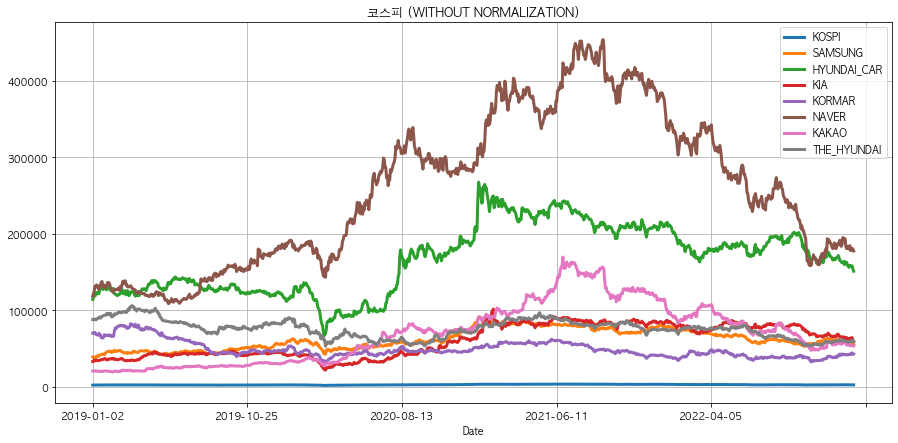

In [10]:
# Plot the data - 정규화된 데이터 제외
show_plot(df=kospi_stocks, fig_title="코스피 (WITHOUT NORMALIZATION)")

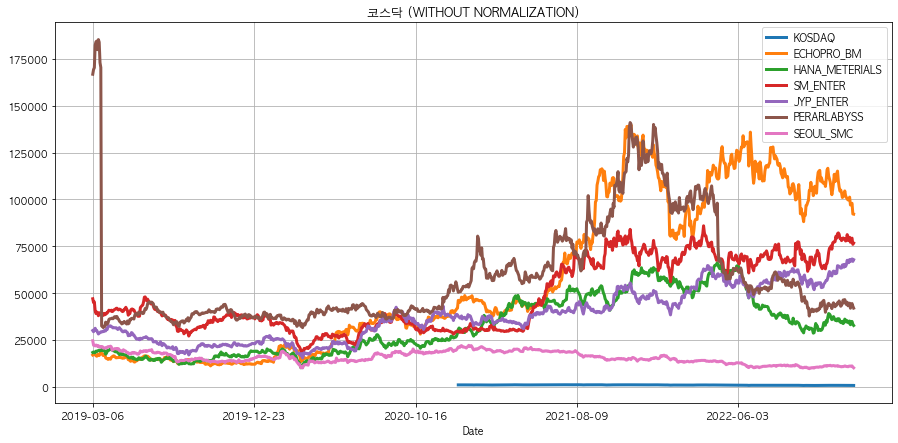

In [11]:
# Plot the data - 정규화된 데이터 제외
show_plot(df=kosdaq_stocks, fig_title="코스닥 (WITHOUT NORMALIZATION)")